In [89]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


# from schrodinger.structutils import analyze
import re
from scipy.spatial import distance
from scipy import stats
from scipy.stats import bootstrap
import seaborn as sns
import matplotlib.ticker as mtick


In [90]:
oak_dir = "/Users/ryan/sherlock_oak/"
data_dir = oak_dir+ "projects/ligand-docking/modeled_structures/data_min_corrected/"
gpcr_db = oak_dir+ "projects/ligand-docking/modeled_structures/scripts/gpcr_db_set.csv"
min_df = pd.read_csv('/Users/ryan/Downloads/results_old_helpers.csv')
rmsd_df = min_df

In [91]:
import ast
def get_type(x):
    x = ast.literal_eval(x)
    if str(x)=='nan':
        print('here!')
        return np.nan
    lig = x[1].split("_lig")[0]
    prot = x[1].split("-to-")[-1]
#     print(x)
    if "AF_" in prot:
        return 'AF_dock'
    elif 'prime_' in prot:
        return 'prime_dock'
    elif 'Gpcrdb' in prot:
#         if 'inactive' in prot:
#             return 'gpcrdb_inactive'
        return 'gpcrdb_dock'
    if lig == prot:
        return 'same_dock'
    else:
        return 'cross_dock'
rmsd_df['type']= rmsd_df['pair_name'].apply(get_type)

In [92]:
print(rmsd_df['type'][0:10])

0      same_dock
1     cross_dock
2        AF_dock
3        AF_dock
4     prime_dock
5     prime_dock
6    gpcrdb_dock
7    gpcrdb_dock
8    gpcrdb_dock
9    gpcrdb_dock
Name: type, dtype: object


In [93]:
def metric(a, b,metric_column, group_column):

#     print(np.mean(b2.groupby('protein').mean()[metric_column]))
#     print(np.mean(a2.groupby('protein').mean()[metric_column]))
    if group_column!=None:
        return np.abs(np.mean(a.groupby(group_column).mean()[metric_column])-np.mean(b.groupby(group_column).mean()[metric_column]))
    else:
        return np.abs(np.mean(a[metric_column])-np.mean(b[metric_column]))
def metric2(a, b, metric_column, group_column):
    if group_column!=None:
        return np.abs(np.median(a.groupby(group_column).mean()[metric_column])-np.median(b.groupby(group_column).mean()[metric_column]))
    else:
        return np.abs(np.median(a[metric_column])-np.median(b[metric_column]))
    
def bootsrap_p_value(a, b,metric_column,group_column,its =1000):
  
    lena = len(a)
    lenb = len(b)
    all_data = pd.concat([a,b])
    all_data=  all_data[~pd.isnull(all_data[metric_column])]

    delta_means = metric(a, b, metric_column,group_column)
    running_sum = 0
    for k in range(its):
        a_new = all_data.sample(lena, replace = True, axis = 0)
        b_new = all_data.sample(lenb, replace = True, axis =0)
        new_delta = metric(a_new, b_new, metric_column,group_column)
        if new_delta>= delta_means:
            running_sum+=1.0
    return running_sum/its, running_sum


def bootsrap_p_value(a, b,metric_column,group_column,its =1000, metric = metric):
  
    lena = len(a)
    lenb = len(b)
    all_data = pd.concat([a,b])
    all_data=  all_data[~pd.isnull(all_data[metric_column])]

    delta_means = metric(a, b, metric_column,group_column)
    running_sum = 0
    def Bigger():
        a_new = all_data.sample(lena, replace = True, axis = 0)
        b_new = all_data.sample(lenb, replace = True, axis =0)
        new_delta = metric(a_new, b_new, metric_column,group_column)
        if new_delta>= delta_means:
            return 1.
        else: 
            return 0.
    running_sum = np.sum([Bigger() for k in range(its)])
#     for k in range(its):
#         a_new = all_data.sample(lena, replace = True, axis = 0)
#         b_new = all_data.sample(lenb, replace = True, axis =0)
#         new_delta = metric(a_new, b_new, metric_column,group_column)
#         if new_delta>= delta_means:
#             running_sum+=1.0
    return running_sum/float(its), running_sum  




In [94]:
rmsd_df['min_wins_2'] = rmsd_df['glide_rmsd'].apply(lambda x: 1 if x<=2.0 else 0)
rmsd_df['min_wins_3'] =rmsd_df['glide_rmsd'].apply(lambda x: 1 if x<=3.0 else 0)

rmsd_df['min_wins_2_top_2'] = rmsd_df['glide_rmsd_top_2'].apply(lambda x: 1 if x<=2.0 else 0)
rmsd_df['min_wins_3_top_2'] =rmsd_df['glide_rmsd_top_2'].apply(lambda x: 1 if x<=3.0 else 0)

rmsd_df['min_wins_2_top_3'] = rmsd_df['glide_rmsd_top_3'].apply(lambda x: 1 if x<=2.0 else 0)
rmsd_df['min_wins_3_top_3'] =rmsd_df['glide_rmsd_top_3'].apply(lambda x: 1 if x<=3.0 else 0)

rmsd_df['min_wins_2_top_5'] = rmsd_df['glide_rmsd_top_5'].apply(lambda x: 1 if x<=2.0 else 0)
rmsd_df['min_wins_3_top_5'] =rmsd_df['glide_rmsd_top_5'].apply(lambda x: 1 if x<=3.0 else 0)
rmsd_df['min_wins_2_top_10'] = rmsd_df['glide_rmsd_top_10'].apply(lambda x: 1 if x<=2.0 else 0)
rmsd_df['min_wins_3_top_10'] =rmsd_df['glide_rmsd_top_10'].apply(lambda x: 1 if x<=3.0 else 0)
rmsd_df['min_wins_2_top_50'] = rmsd_df['glide_rmsd_top_50'].apply(lambda x: 1 if x<=2.0 else 0)
rmsd_df['min_wins_3_top_50'] =rmsd_df['glide_rmsd_top_50'].apply(lambda x: 1 if x<=3.0 else 0)
rmsd_df['min_wins_2_top_100'] = rmsd_df['glide_rmsd_top_100'].apply(lambda x: 1 if x<=2.0 else 0)
rmsd_df['min_wins_3_top_100'] =rmsd_df['glide_rmsd_top_100'].apply(lambda x: 1 if x<=3.0 else 0)

In [7]:
# rmsd_df_bettergpcrdb= rmsd_df[~((rmsd_df['type']=='gpcrdb_dock')& (rmsd_df['protein'].isin(['AGRG3', 'TA2R', 'PE2R4', 'PE2R2'])))]

<IPython.core.display.Javascript object>


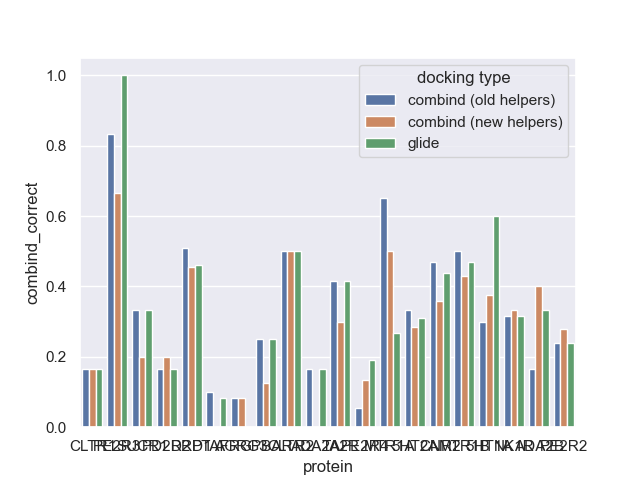

<Axes: xlabel='protein', ylabel='combind_correct'>

In [8]:
# (1) Does ComBind perform substantially better after addition of helper ligands?
import seaborn as sns
%matplotlib notebook
sns.set_theme()

old_file = "results_old_helpers.csv"
new_file = "results_new_helpers.csv"

old_rmsd = pd.read_csv(old_file)
new_rmsd = pd.read_csv(new_file)

# Combine dfs
old_rmsd["docking type"] = "combind (old helpers)"
new_rmsd["docking type"] = "combind (new helpers)"

glide_cmp = old_rmsd.copy()
glide_cmp["combind_rmsd"] = glide_cmp["glide_rmsd"]
glide_cmp["docking type"] = ["glide"] * len(glide_cmp)

rmsds = pd.concat([old_rmsd, new_rmsd, glide_cmp], ignore_index=True)

# Get rid of nans, get correct count (top combind pose rmsd < 2 angstrom)
rmsds = rmsds[(1 - np.ma.masked_invalid(rmsds["combind_rmsd"]).mask).astype(bool)]
rmsds["combind_correct"] = (rmsds["combind_rmsd"] < 2.0).astype(int)

sns.barplot(data=rmsds, x="protein", y="combind_correct", hue="docking type", ci=None)

In [9]:
rms = pd.read_csv("pocket_rms_min_corrected_5_v5.csv")
# rms_full = pd.read_csv("all_rms_data_min_XP_20221120.csv")
# df_temp = pd.read_csv(data_path)
# df_temp['pdb2']= df_temp['Unnamed: 0'].apply(lambda x: x.split('_lig')[0]+'_prot')
# df_temp['pdb1'] = df_temp['Unnamed: 0'].apply(lambda x: x.split('-to-')[-1]+'_prot')
# df_temp['rmsd_new'] = df_temp['rmsd_new']
# rms = pd.read_csv('/Users/mashka/Dror/af_benchmarking/pocket_rms_data_min_XP_20221120.csv')
# rms_sc = pd.read_csv("pocket_rms_min_corrected_5_sc.csv")

rms = rms.rename({'Unnamed: 0':'pair_name'}, axis = 1)

rmsd_df2 = rmsd_df.merge(rms, left_on = 'pair', right_on = 'pair_name', suffixes = ['_old', ''], how = 'outer')


FileNotFoundError: [Errno 2] No such file or directory: 'pocket_rms_min_corrected_5_v5.csv'

In [10]:
# plt.scatter(rmsd_df2['pocket_rmsd_align'], rmsd_df2['glide_rmsd'])
# rmsd_df = rmsd_df2
rmsd_df = rmsd_df[~((rmsd_df['type']=='cross_dock')&(rmsd_df['mol_same']==1))]

plt.scatter(rmsd_df[rmsd_df['type']=='cross_dock']['pocket_rmsd'],rmsd_df[rmsd_df['type']=='cross_dock']['glide_rmsd'], s= 8, label = 'cross dock')
plt.scatter(rmsd_df[rmsd_df['type']=='AF_dock']['pocket_rmsd'],rmsd_df[rmsd_df['type']=='AF_dock']['glide_rmsd'], s= 8, label = 'AF dock')
plt.scatter(rmsd_df[rmsd_df['type']=='gpcrdb_dock']['pocket_rmsd'],rmsd_df[rmsd_df['type']=='gpcrdb_dock']['glide_rmsd'], s= 8, label = 'GPCRdb dock')
# plt.scatter(rmsd_df[rmsd_df['type']=='same_dock']['pocket_rmsd'],rmsd_df[rmsd_df['type']=='same_dock']['glide_rmsd'], s= 8, label = 'Self dock')
plt.scatter(rmsd_df[rmsd_df['type']=='prime_dock']['pocket_rmsd'],rmsd_df[rmsd_df['type']=='prime_dock']['glide_rmsd'], s= 8, label = 'Prime dock')

plt.legend()
plt.xlim(0,4.2)
plt.ylim(0,20)
plt.xlabel('All Atom RMSD of pocket')
plt.plot([0,100],[2,2])
plt.ylabel('rmsd of ligand pose (A)')

KeyError: 'pocket_rmsd'

In [11]:
len(rmsd_df['protein'].unique())

20

In [12]:
df_mcss_cross = rmsd_df[(rmsd_df['type']=='cross_dock')&(rmsd_df['mcss']< 0.5)]
plt.scatter(rmsd_df[rmsd_df['type']=='same_dock']['pocket_rmsd'],rmsd_df[rmsd_df['type']=='same_dock']['glide_rmsd'], s= 8, label = 'Self dock')
plt.scatter(df_mcss_cross['pocket_rmsd'],df_mcss_cross['glide_rmsd'], s= 8, label = 'cross dock')
plt.scatter(rmsd_df[rmsd_df['type']=='AF_dock']['pocket_rmsd'],rmsd_df[rmsd_df['type']=='AF_dock']['glide_rmsd'], s= 8, label = 'AF dock')
plt.scatter(rmsd_df[rmsd_df['type']=='gpcrdb_dock']['pocket_rmsd'],rmsd_df[rmsd_df['type']=='gpcrdb_dock']['glide_rmsd'], s= 8, label = 'GPCRdb dock')
# 
# plt.legend()
plt.xlim(0,4)
plt.ylim(0,15)
plt.xlabel('rmsd of pocket - all atom')
plt.plot([0,100],[2,2])
plt.ylabel('rmsd of ligand pose (A)')
# rms2 = rms2.rename({'Unnamed: 0':'pair_name'}, axis = 1)


KeyError: 'pocket_rmsd'

In [13]:
# gpcr_db
db = pd.read_csv(gpcr_db, skiprows = 0)
db = db[['Unnamed: 7', "Unnamed: 22", 'Unnamed: 11', 'Unnamed: 4']]
db['lig_db'] = db['Unnamed: 7'].apply(lambda x: x+"_lig")

db
# # data['lig']= data.index
# merged= data.merge(db, on = 'lig')
# merged['bin_agonist']= merged['Unnamed: 22']
# merged['state'] = merged['Unnamed: 11']

,Unnamed: 7,Unnamed: 22,Unnamed: 11,Unnamed: 4,lig_db
0,7D76,Agonist,Active,B2 (Adhesion),7D76_lig
1,7D77,Agonist,Active,B2 (Adhesion),7D77_lig
2,7M3F,Agonist\nPAM\nPAM,Active,C (Glutamate),7M3F_lig
3,7M3E,Agonist\nNAM\nPAM,Active,C (Glutamate),7M3E_lig
4,7M3G,Agonist\nPAM\nPAM,Active,C (Glutamate),7M3G_lig
...,...,...,...,...,...
80,7EPB,Agonist,Inactive,C (Glutamate),7EPB_lig
81,7CX2,Agonist,Active,A (Rhodopsin),7CX2_lig
82,7CX4,Agonist,Active,A (Rhodopsin),7CX4_lig
83,7CX3,Agonist,Active,A (Rhodopsin),7CX3_lig


In [14]:
rmsd_df = rmsd_df.merge(db, right_on = ['Unnamed: 7'], left_on = ['struct'], how = 'left')

In [15]:
#whole protein comparison: 
# data_path = oak_dir + "/projects/ligand-docking/modeled_structures/data_no_mi n/global_alignment_scores.csv"
# home_dir = '/home/maschka/sherlock_home/'
# data_path = home_dir + "global_alignment_scores.csv"
data_path = oak_dir+"projects/ligand-docking/modeled_structures/structures/global_aligment_TMscores.csv"
data_path = oak_dir+"projects/ligand-docking/modeled_structures/structures/rmsds_pymol_all.csv"
# data_path = 'rmsd2.csv'
# df_whole_struct = pd.read_csv(data_path)
data_path = "all_rms_data_min_XP_20221120.csv"
df_temp = pd.read_csv(data_path)
# df_temp['pdb2']= df_temp['Unnamed: 0'].apply(lambda x: x.split('_lig')[0]+'_prot')
# df_temp['pdb1'] = df_temp['Unnamed: 0'].apply(lambda x: x.split('-to-')[-1]+'_prot')
df_whole_struct = df_temp


FileNotFoundError: [Errno 2] No such file or directory: 'all_rms_data_min_XP_20221120.csv'

In [ ]:
rmsd_df[['lig', 'struct']]
# rmsd_df['lig'] = rmsd
rmsd_df['lig_struct']  = rmsd_df['lig'].apply(lambda x: str(x).split('_')[0])



In [16]:
df_merged = rmsd_df.merge(df_whole_struct,left_on = 'pair_name', right_on = 'Unnamed: 0', how = 'inner')
# df_merged

NameError: name 'df_whole_struct' is not defined

In [17]:
rmsd_df['min_wins_2'] = rmsd_df['glide_rmsd'].apply(lambda x: 1 if x<=2.0 else 0)
rmsd_df['min_wins_3'] =rmsd_df['glide_rmsd'].apply(lambda x: 1 if x<=3.0 else 0)


rmsd_df['min_wins_2_top_2'] = rmsd_df['glide_rmsd_top_2'].apply(lambda x: 1 if x<=2.0 else 0)
rmsd_df['min_wins_3_top_2'] =rmsd_df['glide_rmsd_top_2'].apply(lambda x: 1 if x<=3.0 else 0)

rmsd_df['min_wins_2_top_3'] = rmsd_df['glide_rmsd_top_3'].apply(lambda x: 1 if x<=2.0 else 0)
rmsd_df['min_wins_3_top_3'] =rmsd_df['glide_rmsd_top_3'].apply(lambda x: 1 if x<=3.0 else 0)

rmsd_df['min_wins_2_top_5'] = rmsd_df['glide_rmsd_top_5'].apply(lambda x: 1 if x<=2.0 else 0)
rmsd_df['min_wins_3_top_5'] =rmsd_df['glide_rmsd_top_5'].apply(lambda x: 1 if x<=3.0 else 0)
rmsd_df['min_wins_2_top_10'] = rmsd_df['glide_rmsd_top_10'].apply(lambda x: 1 if x<=2.0 else 0)
rmsd_df['min_wins_3_top_10'] =rmsd_df['glide_rmsd_top_10'].apply(lambda x: 1 if x<=3.0 else 0)
rmsd_df['min_wins_2_top_50'] = rmsd_df['glide_rmsd_top_50'].apply(lambda x: 1 if x<=2.0 else 0)
rmsd_df['min_wins_3_top_50'] =rmsd_df['glide_rmsd_top_50'].apply(lambda x: 1 if x<=3.0 else 0)
rmsd_df['min_wins_2_top_100'] = rmsd_df['glide_rmsd_top_100'].apply(lambda x: 1 if x<=2.0 else 0)
rmsd_df['min_wins_3_top_100'] =rmsd_df['glide_rmsd_top_100'].apply(lambda x: 1 if x<=3.0 else 0)

In [18]:
# df_whole_struct
# t = sns.load_dataset
df_whole_struct2 = df_merged[~((df_merged['type']=='gpcrdb_dock')&(df_merged['protein'].isin(['AGRG3', 'TA2R', 'PE2R4', 'PE2R2'])))]#PE2R4', 'PE2R2', 'PE2R3', 'GPBAR'

df_whole_struct2 = df_whole_struct2[
    (df_whole_struct2['type'].isin(['AF_dock', 'gpcrdb_dock', 'cross_dock']))
    &(~pd.isnull(df_whole_struct2['rmsd_new']))]

df_whole_struct3 = df_whole_struct2.groupby(['protein', 'type']).mean()
# df_whole_struct3['rmsd']
df_whole_struct3 = df_whole_struct3.reset_index()
type_clean= {
    'AF_dock': "AlphaFold Models",
    'gpcrdb_dock': "GPCRdb Models",
    'cross_dock' : "experimentally determined structures\nwith different ligands bound",
    'same_dock': '',
    'prime_dock' : '',
    np.nan: ''
}
df_whole_struct2['clean_type'] = df_whole_struct2['type'].apply(lambda x: type_clean[x])

df_whole_struct3['clean_type'] = df_whole_struct3['type'].apply(lambda x: type_clean[x])
# sns.stripplot( x = df_whole_struct2['rmsd'], y = df_whole_struct2['clean_type'])
# sns.stripplot( y = 'rmsd', x = 'clean_type', data = df_whole_struct2, order = ["experimental structures\nwithin the same protein","AlphaFold Models","GPCRdb Models"])
plt.figure(figsize = (8,6))
sns.boxplot( y = 'rmsd_new', x = 'clean_type', data = df_whole_struct2, order = [type_clean['cross_dock'],"AlphaFold Models","GPCRdb Models"], orient = 'v')
# plt.ylim(0,20)
plt.xlabel('')
plt.ylabel("RMSD of entire protein")

x1, x2, = 0,2
y = 12
h = 2
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c = 'black')
plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom')


x1, x2, = 0,1
y = 12
h = 2
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c = 'black')
# plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom')


x1, x2, = 1,2
y = 12
h = 2
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c= 'black')
# plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom')

plt.savefig('fullstruct_comparison_stripplot.svg', format = 'svg')


NameError: name 'df_merged' is not defined

In [19]:
# df_whole_struct
# t = sns.load_dataset
df_whole_struct2 = df_merged[~((df_merged['type']=='gpcrdb_dock')&(df_merged['protein'].isin(['AGRG3', 'TA2R', 'PE2R4', 'PE2R2'])))]#PE2R4', 'PE2R2', 'PE2R3', 'GPBAR'

df_whole_struct2 = df_whole_struct2[
    (df_whole_struct2['type'].isin(['AF_dock', 'gpcrdb_dock', 'cross_dock']))
    &(~pd.isnull(df_whole_struct2['rmsd_new']))]

df_whole_struct3 = df_whole_struct2.groupby(['protein', 'type']).mean()
# df_whole_struct3['rmsd']
df_whole_struct3 = df_whole_struct3.reset_index()
type_clean= {
    'AF_dock': "AlphaFold Models",
    'gpcrdb_dock': "GPCRdb Models",
    'cross_dock' : "similar ligand\nexperimental structures\nwithin the same protein",
    'same_dock': '',
    'prime_dock' : '',
    np.nan: ''
}
df_whole_struct2['clean_type'] = df_whole_struct2['type'].apply(lambda x: type_clean[x])

df_whole_struct3['clean_type'] = df_whole_struct3['type'].apply(lambda x: type_clean[x])
rmsd_df_seperate_types = df_whole_struct2
rmsd_df_seperate_types['extended_type'] = rmsd_df_seperate_types.apply(lambda x:
                                                         x['clean_type'] if not (x['type']=="cross_dock" and x['mcss']<0.5) else "dissimilar ligand\nexperimental structures\nwithin the same protein", 
                                                        axis = 1)

# sns.stripplot( x = df_whole_struct2['rmsd'], y = df_whole_struct2['clean_type'])
# sns.stripplot( y = 'rmsd', x = 'clean_type', data = df_whole_struct2, order = ["experimental structures\nwithin the same protein","AlphaFold Models","GPCRdb Models"])
plt.figure(figsize = (8,6))
# sns.boxplot( y = 'rmsd_new', x = 'extended_type', data = rmsd_df_seperate_types, order = ["similar ligand\nexperimental structures\nwithin the same protein","dissimilar ligand\nexperimental structures\nwithin the same protein","AlphaFold Models","GPCRdb Models"], orient = 'v')
# plt.ylim(0,20)
sns.violinplot( y = 'rmsd_new', x = 'extended_type', data = rmsd_df_seperate_types, order = ["similar ligand\nexperimental structures\nwithin the same protein","dissimilar ligand\nexperimental structures\nwithin the same protein","AlphaFold Models","GPCRdb Models"], cut = 0, orient = 'v')

plt.xlabel('')
plt.ylabel("RMSD of entire protein")
plt.savefig('fullstruct_comparison_stripplot.svg', format = 'svg')


NameError: name 'df_merged' is not defined

In [20]:
df_whole_struct2['mcss']

NameError: name 'df_whole_struct2' is not defined

In [21]:
rmsd_df3 = rmsd_df[rmsd_df['type'].isin(['AF_dock', 'gpcrdb_dock', 'cross_dock'])]
rmsd_df3 = rmsd_df3[~((rmsd_df['type']=='cross_dock')&(rmsd_df['mol_same']==1))]

type_clean= {
    'AF_dock': "AlphaFold Models",
    'gpcrdb_dock': "GPCRdb Models",
    'cross_dock' : "experimentally determined structures\nwith different ligands bound",
    'same_dock': '',
    'prime_dock' : '',
    np.nan: ''
}
rmsd_df3['clean_type'] = rmsd_df3['type'].apply(lambda x: type_clean[x])
rmsd_df3 = rmsd_df3[~((rmsd_df3['type']=='gpcrdb_dock')&(rmsd_df3['protein'].isin(['AGRG3', 'TA2R', 'PE2R4', 'PE2R2'])))]
# t['clean_type'] = t['type'].apply(lambda x: type_clean[x])
rmsd_df4 = rmsd_df3.groupby(['protein', 'clean_type'])['pocket_rmsd'].min()
rmsd_df4=rmsd_df4.reset_index()

# rmsd_df4['clean_type']
plt.figure(figsize=(8,6))
# sns.stripplot(data = rmsd_df3, y = 'pocket_rmsd' , x = 'clean_type',order = ["experiment structures within the same protein","AlphaFold Models","GPCRdb Models"])
# sns.stripplot(data = rmsd_df3, y = 'pocket_rmsd' , x = 'clean_type',order = ["experimental structures\nwithin the same protein","AlphaFold Models","GPCRdb Models"], orient = 'v')
sns.boxplot(data = rmsd_df3, y = 'pocket_rmsd' , x = 'clean_type',order = [type_clean['cross_dock'],"AlphaFold Models","GPCRdb Models"], orient = 'v')

plt.ylabel('Binding Pocket RMSD')
plt.xlabel('')


x1, x2, = 0,2
y = 12
h = 1.6
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c = 'black')
plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom')


x1, x2, = 0,1
y = 12
h = 1.6
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c = 'black')
# plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom')


x1, x2, = 1,2
y = 12
h = 1.6
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.2, c= 'black')
# plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom')


plt.savefig('pocket_comparison_stripplot.svg', format = 'svg')
# plt.title('binding pocket RMSD comparisons')
# plt.ylim(0,4)

/var/folders/8f/br10514d7s5flpfcf8y7j40r0000gn/T/ipykernel_9160/3661671746.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rmsd_df3 = rmsd_df3[~((rmsd_df['type']=='cross_dock')&(rmsd_df['mol_same']==1))]


KeyError: 'Column not found: pocket_rmsd'

In [ ]:
x1 = df_merged[df_merged['type']=='cross_dock']
x2 = df_merged[df_merged['type']=='AF_dock']
x3 = df_merged[df_merged['type']=='gpcrdb_dock']


# print("RMSD t-tests")
# print(bootsrap_p_value(x1,x2, 'pocket_rmsd', 'lig',int(10e3)), metric2)
# print(bootsrap_p_value(x2,x3, 'pocket_rmsd', 'lig',int(10e3)), metric2)
# print(bootsrap_p_value(x1,x3, 'pocket_rmsd', 'lig',int(10e3)), metric2)
# print(bootsrap_p_value(x1,x1, 'pocket_rmsd', 'lig',int(10e3)), metric2)
stats.kruskal(x1['pocket_rmsd'], x2['pocket_rmsd'])


In [22]:
rmsd_df3 = rmsd_df[rmsd_df['type'].isin(['AF_dock', 'gpcrdb_dock', 'cross_dock'])]
rmsd_df3 = rmsd_df3[~((rmsd_df['type']=='cross_dock')&(rmsd_df['mol_same']==1))]
type_clean= {
    'AF_dock': "AlphaFold Models",
    'gpcrdb_dock': "GPCRdb Models",
    'cross_dock' : "experimental structures\nwithin the same protein",
    'same_dock': '',
    'prime_dock' : '',
    np.nan: ''
}
rmsd_df3['clean_type'] = rmsd_df3['type'].apply(lambda x: type_clean[x])
rmsd_df3 = rmsd_df3[~((rmsd_df3['type']=='gpcrdb_dock')&(rmsd_df3['protein'].isin(['AGRG3', 'TA2R', 'PE2R4', 'PE2R2'])))]
# t['clean_type'] = t['type'].apply(lambda x: type_clean[x])
rmsd_df4 = rmsd_df3.groupby(['protein', 'clean_type'])['pocket_rmsd'].min()
rmsd_df4=rmsd_df4.reset_index()

# rmsd_df4['clean_type']
plt.figure(figsize=(8,6))
# sns.stripplot(data = rmsd_df3, y = 'pocket_rmsd' , x = 'clean_type',order = ["experiment structures within the same protein","AlphaFold Models","GPCRdb Models"])
# sns.stripplot(data = rmsd_df3, y = 'pocket_rmsd' , x = 'clean_type',order = ["experimental structures\nwithin the same protein","AlphaFold Models","GPCRdb Models"], orient = 'v')
# sns.boxplot(data = rmsd_df3, y = 'pocket_rmsd' , x = 'clean_type',order = ["experimental structures\nwithin the same protein","AlphaFold Models","GPCRdb Models"], orient = 'v')
sns.violinplot(data = rmsd_df3, y = 'pocket_rmsd' , x = 'clean_type',order = ["experimental structures\nwithin the same protein","AlphaFold Models","GPCRdb Models"], 
               cut = 0, bw = 'scott', gridsize = 50,
            orient = 'v')

plt.ylabel('Binding Pocket RMSD')
plt.xlabel('')
plt.savefig('pocket_comparison_stripplot.svg', format = 'svg')
# plt.title('binding pocket RMSD comparisons')
# plt.ylim(0,4)

/var/folders/8f/br10514d7s5flpfcf8y7j40r0000gn/T/ipykernel_9160/3506554109.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rmsd_df3 = rmsd_df3[~((rmsd_df['type']=='cross_dock')&(rmsd_df['mol_same']==1))]


KeyError: 'Column not found: pocket_rmsd'

/var/folders/8f/br10514d7s5flpfcf8y7j40r0000gn/T/ipykernel_9160/1785552876.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rmsd_df3 = rmsd_df3[~((rmsd_df['type']=='cross_dock')&(rmsd_df['mol_same']==1))]


<IPython.core.display.Javascript object>


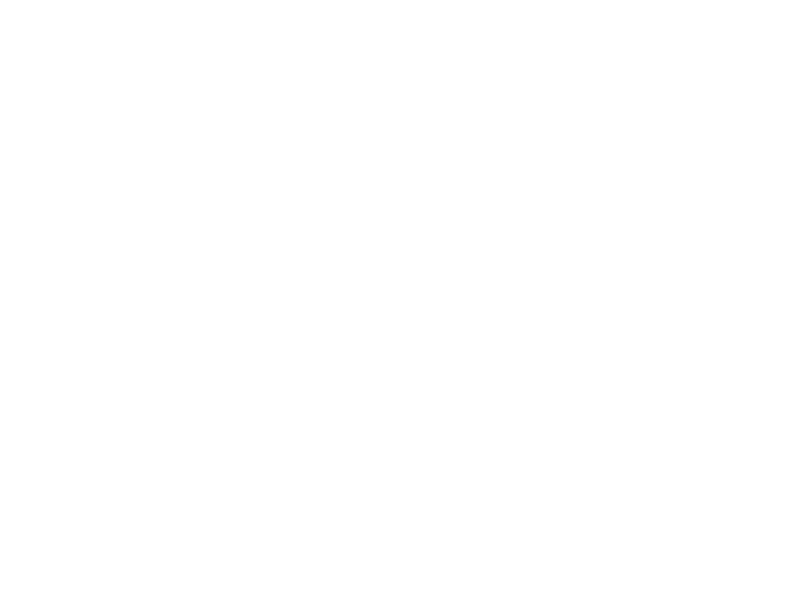

ValueError: Could not interpret input 'pocket_rmsd'

In [23]:
rmsd_df3 = rmsd_df[rmsd_df['type'].isin(['AF_dock', 'gpcrdb_dock', 'cross_dock'])]
rmsd_df3 = rmsd_df3[~((rmsd_df['type']=='cross_dock')&(rmsd_df['mol_same']==1))]
type_clean= {
    'AF_dock': "AlphaFold Models",
    'gpcrdb_dock': "GPCRdb Models",
    'cross_dock' : "similar ligand\n experimental structures\nwithin the same protein",
    'same_dock': '',
    'prime_dock' : '',
    np.nan: ''
}
rmsd_df3['clean_type'] = rmsd_df3['type'].apply(lambda x: type_clean[x])
rmsd_df_seperate_types = rmsd_df3
rmsd_df_seperate_types['extended_type'] = rmsd_df_seperate_types.apply(lambda x:
                                                         x['clean_type'] if not (x['type']=="cross_dock" and x['mcss']<0.5) else 'unique ligand\n experimental structures', 
                                                        axis = 1)
plt.figure(figsize=(8,6))
# sns.boxplot(data = rmsd_df3, y = 'pocket_rmsd' , x = 'extended_type',
#                order = ["similar ligand\n experimental structures\nwithin the same protein", "unique ligand\n experimental structures",
#                         "AlphaFold Models","GPCRdb Models"], orient = 'v')

sns.violinplot(data = rmsd_df3, y = 'pocket_rmsd' , x = 'extended_type',
               order = ["similar ligand\n experimental structures\nwithin the same protein", "unique ligand\n experimental structures",
                        "AlphaFold Models","GPCRdb Models"], orient = 'v', cut = 0.)
plt.ylabel('Binding Pocket RMSD')
plt.xlabel('')
plt.savefig('pocket_comparison_stripplot.svg', format = 'svg')

# plt.title('binding pocket RMSD comparisons')

In [ ]:
rmsd_df[rmsd_df['pocket_rmsd']>6]

In [24]:
x1 = df_merged[df_merged['type']=='cross_dock']
x2 = df_merged[df_merged['type']=='AF_dock']
x3 = df_merged[df_merged['type']=='gpcrdb_dock']


print("RMSD t-tests")
print(bootsrap_p_value(x1,x2, 'rmsd_new', 'lig',int(10e4)))
print(bootsrap_p_value(x2,x3, 'rmsd_new', 'lig',int(10e4)))
print(bootsrap_p_value(x1,x3, 'rmsd_new', 'lig',int(10e4)))
print(bootsrap_p_value(x1,x1, 'rmsd_new', 'lig',int(10e4)))



In [25]:
x1 = df_merged[df_merged['type']=='cross_dock']
x2 = df_merged[df_merged['type']=='AF_dock']
x3 = df_merged[df_merged['type']=='gpcrdb_dock']


print("RMSD t-tests")
print(bootsrap_p_value(x1,x2, 'pocket_rmsd', 'lig',int(10e3)), metric2)
print(bootsrap_p_value(x2,x3, 'pocket_rmsd', 'lig',int(10e3)), metric2)
print(bootsrap_p_value(x1,x3, 'pocket_rmsd', 'lig',int(10e3)), metric2)
print(bootsrap_p_value(x1,x1, 'pocket_rmsd', 'lig',int(10e3)), metric2)



In [26]:
rmsd_df3

In [27]:
x1 = df_merged[df_merged['type']=='cross_dock']
x2 = df_merged[df_merged['type']=='AF_dock']
x3 = df_merged[df_merged['type']=='gpcrdb_dock']


print("RMSD t-tests")
print(bootsrap_p_value(x1,x2, 'pocket_rmsd', 'lig',int(10e4)))
print(bootsrap_p_value(x2,x3, 'pocket_rmsd', 'lig',int(10e4)))
print(bootsrap_p_value(x1,x3, 'pocket_rmsd', 'lig',int(10e4)))
print(bootsrap_p_value(x1,x1, 'pocket_rmsd', 'lig',int(10e4)))



In [28]:
ms = []
us = []
ls = []
for t in ['same_dock', 'cross_dock', 'AF_dock', 'gpcrdb_dock', 'cross_dock_hard']:
    if t == 'same_dock': 
        continue
#         m =rmsd_df[(rmsd_df['struct'].str.contains(''))&(rmsd_df['type']==t)].groupby('lig')['min_wins_2'].mean()
#         l,u = bootstrap((rmsd_df[(rmsd_df['struct'].str.contains(''))&(rmsd_df['type']==t)&(~rmsd_df['protein'].isin(['AGRG3', 'TA2R', 'PE2R4', 'PE2R2']))]['min_wins_2'].to_numpy(),),np.mean, confidence_level = 0.95).confidence_interval
    if t =='gpcrdb_dock':
#         'AGRG3', 'TA2R', 'PE2R4', 'PE2R2'
        m =rmsd_df[(rmsd_df['struct'].str.contains(''))&(rmsd_df['type']==t)&(~rmsd_df['protein'].isin(['AGRG3', 'TA2R', 'PE2R4', 'PE2R2']))].groupby('lig')['min_wins_2'].mean()
        print((rmsd_df[(rmsd_df['struct'].str.contains(''))&(rmsd_df['type']==t)&(~rmsd_df['protein'].isin(['AGRG3', 'TA2R', 'PE2R4', 'PE2R2']))]['min_wins_2'].to_numpy(),))
        l,u = bootstrap((rmsd_df[(rmsd_df['struct'].str.contains(''))&(rmsd_df['type']==t)&(~rmsd_df['protein'].isin(['AGRG3', 'TA2R', 'PE2R4', 'PE2R2']))]['min_wins_2'].to_numpy(),),np.mean, confidence_level = 0.95).confidence_interval
    elif t=='cross_dock_hard':
        m = rmsd_df[(rmsd_df['type']=='cross_dock')& (rmsd_df['mcss']<0.5)].groupby('lig')['min_wins_2'].mean()
        l,u = bootstrap((rmsd_df[(rmsd_df['type']=='cross_dock')& (rmsd_df['mcss']<0.5)]['min_wins_2'].to_numpy(),),np.mean, confidence_level = 0.95).confidence_interval
    elif t=='cross_dock':
        m = rmsd_df[(rmsd_df['type']==t)].groupby('lig')['min_wins_2'].mean()
        l,u = bootstrap((rmsd_df[(rmsd_df['type']==t)]['min_wins_2'].to_numpy(),),np.mean, confidence_level = 0.95).confidence_interval
    else:
        m =rmsd_df[(rmsd_df['type']==t)&( rmsd_df['mcss']<1.5)&(~rmsd_df['protein'].isin([]))].groupby('lig')['min_wins_2'].mean()
        l,u = bootstrap((rmsd_df[(rmsd_df['type']==t)&(~rmsd_df['protein'].isin([]))]['min_wins_2'].to_numpy(),),np.mean, confidence_level = 0.95).confidence_interval
#         print(len(m))
#         print(len()
#         print(np.nanmean(m))
#     else:
    m = np.mean(m)
    ms.append(m*100)
    ls.append((m-l)*100)
    us.append((u-m)*100)
    
cs= [ls, us]
plt.figure(figsize = (8,6))
# print(len(m))
plt.bar([1], ms[0],yerr= [[ls[0]], [us[0]]], alpha = 0.6, capsize = 2, color = 'C0', label = 'all other structures', edgecolor = 'dimgray', linewidth = 2)
plt.bar([1], ms[3],yerr= [[ls[3]], [us[3]]], alpha = 1, capsize = 2, color = 'C0' ,label = 'structures with dissimilar ligands only',edgecolor = 'dimgray', linewidth = 2)
plt.bar([2,3], ms[1:3],yerr= [ls[1:3], us[1:3]], capsize = 2, color = ['C1', 'C2'], edgecolor = 'dimgray', linewidth = 2)
plt.legend()
plt.xticks([1,2,3],["To structure\n determined experimentally\nwith different ligand bound","To AlphaFold model","To GPCRdb model"]) 
plt.ylabel('Fraction of ligands correctly docked')
# plt.title('Glide Docking Results')


x1, x2, = 2,3
y = 30
h = 5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c = 'black')
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom')


x1, x2, = 1,2
y = 63
h = 5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c = 'C1')
plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom')


x1, x2, = 1,3
y = 73
h = 5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c= 'green')
plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom')

plt.ylim(0,84)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.savefig("GlideDockingresults.svg")
plt.savefig("GlideDockingresults.png")

plt.show()


In [29]:
ms = []
us = []
ls = []
for t in ['same_dock', 'cross_dock', 'AF_dock', 'gpcrdb_dock', 'cross_dock_hard', 'cross_dock_similar']:
    if t == 'same_dock': 
        continue
#         m =rmsd_df[(rmsd_df['struct'].str.contains(''))&(rmsd_df['type']==t)].groupby('lig')['min_wins_2'].mean()
#         l,u = bootstrap((rmsd_df[(rmsd_df['struct'].str.contains(''))&(rmsd_df['type']==t)&(~rmsd_df['protein'].isin(['AGRG3', 'TA2R', 'PE2R4', 'PE2R2']))]['min_wins_2'].to_numpy(),),np.mean, confidence_level = 0.95).confidence_interval
    if t =='gpcrdb_dock':
#         'AGRG3', 'TA2R', 'PE2R4', 'PE2R2'
        m =rmsd_df[(rmsd_df['struct'].str.contains(''))&(rmsd_df['type']==t)&(~rmsd_df['protein'].isin(['AGRG3', 'TA2R', 'PE2R4', 'PE2R2']))].groupby('lig')['min_wins_2'].mean()
        l,u = bootstrap((rmsd_df[(rmsd_df['struct'].str.contains(''))&(rmsd_df['type']==t)&(~rmsd_df['protein'].isin(['AGRG3', 'TA2R', 'PE2R4', 'PE2R2']))]['min_wins_2'].to_numpy(),),np.mean, confidence_level = 0.95).confidence_interval
    elif t=='cross_dock_hard':
        m = rmsd_df[(rmsd_df['type']=='cross_dock')& (rmsd_df['mcss']<0.5)].groupby('lig')['min_wins_2'].mean()
        l,u = bootstrap((rmsd_df[(rmsd_df['type']=='cross_dock')& (rmsd_df['mcss']<0.5)]['min_wins_2'].to_numpy(),),np.mean, confidence_level = 0.95).confidence_interval
    elif t=='cross_dock':
        m = rmsd_df[(rmsd_df['type']==t)].groupby('lig')['min_wins_2'].mean()
        l,u = bootstrap((rmsd_df[(rmsd_df['type']==t)]['min_wins_2'].to_numpy(),),np.mean, confidence_level = 0.95).confidence_interval
   
    elif t == 'cross_dock_similar':
        m = rmsd_df[(rmsd_df['type']=='cross_dock')& (rmsd_df['mcss']>=0.5)].groupby('lig')['min_wins_2'].mean()
        l,u = bootstrap((rmsd_df[(rmsd_df['type']=='cross_dock')& (rmsd_df['mcss']>=0.5)]['min_wins_2'].to_numpy(),),np.mean, confidence_level = 0.95).confidence_interval
        
    else:
        m =rmsd_df[(rmsd_df['type']==t)&( rmsd_df['mcss']<1.5)&(~rmsd_df['protein'].isin([]))].groupby('lig')['min_wins_2'].mean()
        l,u = bootstrap((rmsd_df[(rmsd_df['type']==t)&(~rmsd_df['protein'].isin([]))]['min_wins_2'].to_numpy(),),np.mean, confidence_level = 0.95).confidence_interval
#         print(len(m))
#         print(len()
#         print(np.nanmean(m))
#     else:
    m = np.mean(m)
    ms.append(m)
    ls.append(m-l)
    us.append(u-m)
    
cs= [ls, us]
plt.figure(figsize = (8,6))
# print(len(m))
plt.bar([1], ms[4],yerr= [[ls[4]], [us[4]]], alpha = 0.6, capsize = 2, color = 'C3', edgecolor = 'dimgray', linewidth = 2)
plt.bar([2], ms[0],yerr= [[ls[0]], [us[0]]], alpha = 0.6, capsize = 2, color = 'C0', label = 'all other structures', edgecolor = 'dimgray', linewidth = 2)
plt.bar([2], ms[3],yerr= [[ls[3]], [us[3]]], alpha = 1, capsize = 2, color = 'C0' ,label = 'structures with dissimilar ligands only',edgecolor = 'dimgray', linewidth = 2)
plt.bar([3,4], ms[1:3],yerr= [ls[1:3], us[1:3]], capsize = 2, color = ['C1', 'C2'], edgecolor = 'dimgray', linewidth = 2)
plt.legend()
plt.xticks([1,2,3,4],["Similal ligand\nTo other\nexperimtal structure","Dissimilar ligand\nTo other\nexperimtal structure","To AlphaFold model","To GPCRdb model"]) 
plt.ylabel('Fraction of ligands correctly docked')
plt.title('Glide Docking Results')


x1, x2, = 3,4
y = 0.3
h = 0.05
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c = 'black')
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom')


x1, x2, = 2,3
y = 0.63
h = 0.05
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c = 'C1')
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom')


x1, x2, = 2,4
y = 0.73
h = 0.05
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c= 'green')
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom')

plt.ylim(0,.84)
# plt.savefig

In [30]:
rmsd_df3

In [31]:
x1 = df_merged[df_merged['type']=='cross_dock']
x2 = df_merged[df_merged['type']=='AF_dock']
x3 = df_merged[df_merged['type']=='gpcrdb_dock']


print("RMSD t-tests")
print(bootsrap_p_value(x1,x2, 'min_wins_2', 'lig',int(10e4)))
print(bootsrap_p_value(x2,x3, 'min_wins_2', 'lig',int(10e4)))
print(bootsrap_p_value(x1,x3, 'min_wins_2', 'lig',int(10e4)))
print(bootsrap_p_value(x1,x1, 'min_wins_2', 'lig',int(10e4)))

In [32]:
# # plt.scatter(kept[kept['type']=='cross_dock']['pocket_rmsd'],[1 if k < 2 else 0 for k in  kept[kept['type']=='cross_dock']['glide_rmsd']])

score_name_map={'glide_rmsd_top_2':'top 2','glide_rmsd_top_5':'top 5','glide_rmsd_top_50':'top 50','glide_rmsd_top_100':'top 100','glide_rmsd_top_10':'top 10','glide_rmsd':"glide score analysis", 'glide_rmsd_old_no':"structprep with ligand - no minimize", 'glide_rmsd_old': "minimized with ligand"}
model_name_map={'cross_dock_hard':'to other structure with dissimilar ligand',
                'same_dock':'native struct', 'AF_dock': 'to AlphaFold models', 'cross_dock': 'to other structure', 'gpcrdb_dock':'to GPCRdb models'}
# for score in ['glide_rmsd_top_2', 'glide_rmsd_top_5', 'glide_rmsd_top_10', 'glide_rmsd', 'glide_rmsd_top_100', 'glide_rmsd_top_50']:# ,'glide_rmsd_old']:#, 'glide_rmsd_old_no']:
for score in ['glide_rmsd']:
#     plt.figure(score)
#     plt.figure(figsize =(10,6))

    for model_type in ['cross_dock','AF_dock']:
        count = 0
        
        if score =='glide_rmsd_old' and model_type == 'cross_dock':
            continue

        prev = 0
        if model_type =='cross_dock_hard':
            temp_db = rmsd_df[(rmsd_df['type']=='cross_dock')]
            temp_db= temp_db[temp_db['mcss']<0.5]
            print(len(temp_db))
        elif model_type == 'gpcrdb_dock':
            temp_db = rmsd_df[(rmsd_df['type']== model_type)]
        else:
            temp_db = rmsd_df[rmsd_df['type']==model_type]

        distance_string = 'pocket_rmsd'

        def distance_kernel(val,row2,h):
            if np.abs(row2[distance_string]-val)>=h:
                return np.nan
            return 0.75*(1-(val-row2[distance_string])**2/h)
        xs = []
        vs= []
        v_low = []
        v_high = []
        counts = []
        binspace = np.linspace(0,5,300)
        for val in binspace:
            ds =[]
            v_temp = []
            for k2, row2 in temp_db.iterrows():
                d=distance_kernel(val,row2,0.25)
                if np.isnan(d):
                    continue
                ds.append(d)
                if np.isnan(row2[score]):
                    continue
                v_temp.append((row2[score]<2.0)*d*100)
            counts.append(len(v_temp))
            
            if len(v_temp)<5 or min(v_temp)==max(v_temp):
                continue
            count +=1
            
            if val < min(temp_db[distance_string])+0.15:
                continue
#             if (len(v_temp)<)
#             print(v_temp)
            
            res = bootstrap((v_temp,), np.mean, confidence_level=0.8)

            if res.confidence_interval[1]-res.confidence_interval[0] < 0.0:
#                 vs.append(np.nan)
#                 xs.append(val)
                continue
            v_low.append(res.confidence_interval[0])
            v_high.append(res.confidence_interval[1])
            vs.append(np.mean(v_temp))
            xs.append(val)
#         plt.figure(1)
        plt.plot(xs, vs, label=model_name_map[model_type] )
        plt.fill_between(xs, v_high, v_low, alpha = 0.3)
#         plt.figure(2)
#         plt.plot(binspace, counts)
plt.legend(bbox_to_anchor=(0.5, 1), loc='upper center', borderaxespad=0.)
plt.xlim(0.25,2.0)
plt.xlabel('binding pocket RMSD')
plt.ylabel('average pose accuracy')
plt.ylim(0,60)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# plt.figure(2)
# plt.legend(bbox_to_anchor=(0.5, 1), loc='upper center', borderaxespad=0.)
# plt.xlim(0,2.0)
# plt.ylim(0,10)
# plt.xlabel('binding pocket RMSD')
# plt.ylabel('number of things')

# f1 = rmsd_df[rmsd_df['type']=='AF_dock']
# plt.scatter(f1['pocket_rmsd'], f1['glide_rmsd'])

plt.savefig("main_moothed_2.svg")


In [ ]:
# # plt.scatter(kept[kept['type']=='cross_dock']['pocket_rmsd'],[1 if k < 2 else 0 for k in  kept[kept['type']=='cross_dock']['glide_rmsd']])

score_name_map={'glide_rmsd_top_2':'top 2','glide_rmsd_top_5':'top 5','glide_rmsd_top_50':'top 50','glide_rmsd_top_100':'top 100','glide_rmsd_top_10':'top 10','glide_rmsd':"glide score analysis", 'glide_rmsd_old_no':"structprep with ligand - no minimize", 'glide_rmsd_old': "minimized with ligand"}
model_name_map={'cross_dock_hard':'to other structure with dissimilar ligand',
                'same_dock':'native struct', 'AF_dock': 'to AlphaFold models', 'cross_dock': 'to other structure', 'gpcrdb_dock':'to GPCRdb models'}
# for score in ['glide_rmsd_top_2', 'glide_rmsd_top_5', 'glide_rmsd_top_10', 'glide_rmsd', 'glide_rmsd_top_100', 'glide_rmsd_top_50']:# ,'glide_rmsd_old']:#, 'glide_rmsd_old_no']:
for score in ['glide_rmsd_top_100']:
    plt.figure(score)
    for model_type in ['cross_dock','AF_dock', 'gpcrdb_dock']:
        count = 0
        
        if score =='glide_rmsd_old' and model_type == 'cross_dock':
            continue

        prev = 0
        if model_type =='cross_dock_hard':
            temp_db = rmsd_df[(rmsd_df['type']=='cross_dock')]
            temp_db= temp_db[temp_db['mcss']<0.5]
            print(len(temp_db))
        elif model_type == 'gpcrdb_dock':
            temp_db = rmsd_df[(rmsd_df['type']== model_type)]
        else:
            temp_db = rmsd_df[rmsd_df['type']==model_type]

        distance_string = 'pocket_rmsd'

        def distance_kernel(val,row2,h):
            if np.abs(row2[distance_string]-val)>=h:
                return np.nan
            return 0.75*(1-(val-row2[distance_string])**2/h)
        xs = []
        vs= []
        v_low = []
        v_high = []
        counts = []
        binspace = np.linspace(0,5,300)
        for val in binspace:
            ds =[]
            v_temp = []
            for k2, row2 in temp_db.iterrows():
                d=distance_kernel(val,row2,0.2)
                if np.isnan(d):
                    continue
                ds.append(d)
                if np.isnan(row2[score]):
                    continue
                v_temp.append((row2[score]<2.0)*d)
            counts.append(len(v_temp))
            
            if len(v_temp)<5 or min(v_temp)==max(v_temp):
                continue
            count +=1
            
            if val < min(temp_db[distance_string])+0.15:
                continue
#             if (len(v_temp)<)
#             print(v_temp)
            
            res = bootstrap((v_temp,), np.mean, confidence_level=0.8)

            if res.confidence_interval[1]-res.confidence_interval[0] < 0.0:
#                 vs.append(np.nan)
#                 xs.append(val)
                continue
            v_low.append(res.confidence_interval[0])
            v_high.append(res.confidence_interval[1])
            vs.append(np.mean(v_temp))
            xs.append(val)
        plt.figure(1)
        plt.plot(xs, vs, label=model_name_map[model_type] )
        plt.fill_between(xs, v_high, v_low, alpha = 0.3)
        plt.figure(2)
        plt.plot(binspace, counts)
plt.figure(1)
plt.legend(bbox_to_anchor=(0.5, 1), loc='upper center', borderaxespad=0.)
plt.xlim(0,4.0)
plt.xlabel('binding pocket RMSD')
plt.ylabel('expectation pose correct')

# plt.figure(2)
# plt.legend(bbox_to_anchor=(0.5, 1), loc='upper center', borderaxespad=0.)
# plt.xlim(0,4.0)
# plt.ylim(0,10)
# plt.xlabel('binding pocket RMSD')
# plt.ylabel('number of things')

# f1 = rmsd_df[rmsd_df['type']=='AF_dock']
# plt.scatter(f1['pocket_rmsd'], f1['glide_rmsd'])




In [58]:
# plt.scatter(df_merged[df_merged['type']=='cross_dock']['pocket_rmsd'],[1 if k < 2 else 0 for k in  df_merged[df_merged['type']=='cross_dock']['glide_rmsd']])
bin_count = 8

prev = 0
probs = np.zeros(bin_count)
probsstd = np.zeros((2,bin_count))
d = 0
pocket_space = np.linspace(0.5,2, bin_count)
# pocket_spoace = [0.2, 0.5, 0.99,1.1
# ,1.5,2]
for score in [ 'glide_rmsd']:
    for model_type in ['same_dock','cross_dock', 'AF_dock']:
    #     pocket_space = np.linspace(min(df_merged[df_merged['type']==model_type]['pocket_rmsd']),max( df_merged[df_merged['type']==model_type]['pocket_rmsd'])+0.1, bin_count)

        prev = 0
        probs = np.zeros(bin_count)
        d = 0
        w = []
        for k in pocket_space:
            if model_type =='cross_dock':
#                 temp_db = k2[k2['type']==model_type]
                temp_db = df_merged[(df_merged['type']==model_type)&(df_merged['mcss']<0.5)]

            else:
                temp_db = df_merged[df_merged['type']==model_type]
            bucket = temp_db[(temp_db['pocket_rmsd'].between(prev, k))]
        #     print(bucket['glide_rmsd'])
            prob = np.nanmean([1. if  j< 2.0 else 0.0 for j in bucket[score]])
            
            probs[d]=prob
#             probsstd[d]=probstd
            w.append(len(bucket))
            if (len(bucket)<5):
                probs[d]=np.nan
               
            else: 
#                 print(bucket[score])
#                 probsstd[:,d]
                l, u= bootstrap(([1. if  j< 2.0 else 0.0 for j in bucket[score]],), np.mean, confidence_level = 0.9).confidence_interval
                probsstd[:, d]  =[prob-l, u-prob]
                print( u)
            prev = k
            d +=1
#         plt.plot(pocket_space, probs,)
#         plt.scatter(pocket_space, probs, label = model_type+ " "+ score, s = w)
        plt.errorbar(pocket_space, probs,probsstd, label = model_type+ " "+ score)


plt.legend()
plt.xlim(0,4)
# plt.ylim(0,1)
plt.xlabel('pocket rmsd')
plt.ylabel('probability pose correct')

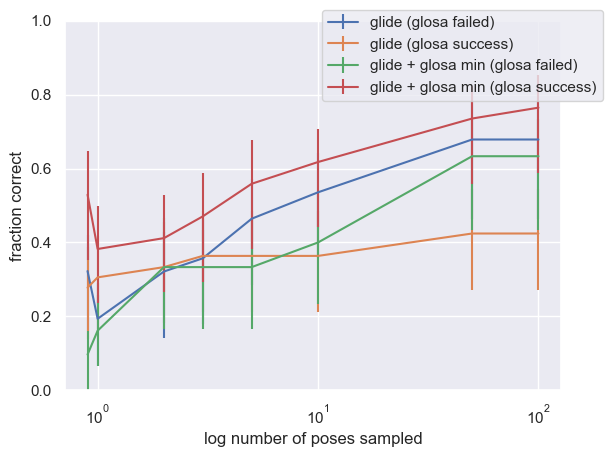

<Figure size 640x480 with 0 Axes>

In [131]:
def plot(d, label=None, ax=None):
    if ax is None:
        ax = plt.gca()
    for t in types:
        vals = []
        xs = []
        highs = []
        lows = []
        errs = np.zeros((2,len(top_n_map)))
        j = -1
        temp = d
        for k in top_n_map:
            j +=1
            if t == 'distinct_cross_dock':
                val = [1 if s<=3 else 0 for s in temp[(temp['type']=='cross_dock')&(temp['mcss']<=0.5)][k]if not np.isnan(s)]
            elif t == 'gpcrdb_decent':
                val = [1 if s<=3 else 0 for s in temp[(temp['type']=='gpcrdb_dock')&(~temp['protein'].isin(['AGRG3', 'TA2R', 'PE2R4', 'PE2R2']))][k]if not np.isnan(s)]
            elif t == 'gpcrdb_active':
                val = [1 if s<=3 else 0 for s in temp[(temp['type']=='gpcrdb_dock')&(temp['struct'].str.contains('_active'))][k]if not np.isnan(s)]
            else:
    #                 print(t)
                val =  [1 if s<=3 else 0 for s in temp[temp['type']==t][k]if not np.isnan(s)]
    #                 print(val)
#            if len(val)<15:
#                continue
            xs.append(top_n_map[k])
            vals.append(np.sum(val)/len(val))
    #             print(val)
            if len(val) >= 10:
                l, u = bootstrap((val,), np.nanmean, confidence_level = 0.90).confidence_interval
            else:
                l, u = 0, 0
            lows.append(l)
            highs.append(min(u, 1.0))
            errs[:,j]=[vals[-1]-l,u-vals[-1]]

        ax.errorbar(xs, vals, errs, alpha = 0.999, label = label or t)
    #     break
    #         plt.scatter(xs, vals)
        ax.legend()
        # plt.xlim(0.7,101)
        ax.set_ylim(0,1)
    #         plt.title('Fraction correct pose with Glide, 90%confidence')
        ax.set_xlabel('log number of poses sampled')
        ax.legend(bbox_to_anchor=(1.1, 1.05))
        ax.set_xscale('log')
        ax.set_ylabel('fraction correct')


GLOSA = True

types = ['same_dock', 'AF_dock', 'cross_dock', 'gpcrdb_decent', 'distinct_cross_dock','new_min_str']
if GLOSA:
    types = ["AF_dock"]

# key should include: glosa_glide, original_glide, glosa_glide_good_matches, glosa_glide_bad_matches

top_n_map = {
    'combind_rmsd': 0.9,
    'glide_rmsd':1,
    'glide_rmsd_top_2':2,
    'glide_rmsd_top_3':3,
    'glide_rmsd_top_5':5,
    'glide_rmsd_top_10':10,
    'glide_rmsd_top_50':50,
    'glide_rmsd_top_100':100
}

#     temp = rmsd_df[(rmsd_df['pocket_rmsd'].between(k, k+10))]
    
#     plt.title('Fraction of correctly sampled poses with number of s')
# temp = rmsd_df
plt.figure()

if GLOSA:
    glosa = pd.read_csv('/Users/ryan/Downloads/results_af_glosa.csv')
    glosa["type"] = "AF_dock"
    hard = "PE2R4, PE2R3, PD2R2, TA2R, MTR1A, MTR1B, SUCR1, CLTR1, CLTR2, PE2R2, AGRG3, GRM2".split(", ")
    
    crystal = pd.read_csv('/Users/ryan/Downloads/results_af_crystal_v2.csv')
    crystal["type"] = "AF_dock"
    
    helper = pd.read_csv('/Users/ryan/Downloads/results_af_dock_min_exp.csv')
    helper["type"] = "AF_dock"
    
    dfs = {#"glide": rmsd_df, 
           #"glide + glosa min": glosa, 
           #"glide + crystal lig min ": crystal,
           #"glide + helper lig min ": helper,
        
           #"glide (glosa failed)": rmsd_df[rmsd_df["protein"].isin(hard)],
           #"glide (glosa success)": rmsd_df[~rmsd_df["protein"].isin(hard)],
        
           #"glide + glosa min (glosa failed)": glosa[glosa["protein"].isin(hard)], 
           #"glide + glosa min (glosa success)": glosa[~glosa["protein"].isin(hard)],

           #"glide + crystal lig min (glosa failed)": crystal[crystal["protein"].isin(hard)],
           #"glide + crystal lig min (glosa success)": crystal[~crystal["protein"].isin(hard)],
        
           #"glide + helper lig min (glosa failed)": helper[helper["protein"].isin(hard)], 
           #"glide + helper lig min (glosa success)": helper[~helper["protein"].isin(hard)],
          }
    for label, d in dfs.items():
        #print(label, bootsrap_p_value(d, rmsd_df, "min_pose_rmsd", None))
        plot(d, label=label)

    plt.figure()
 
#    glosa["min_pose_diff"] = [rmsd - rmsd_df[rmsd_df["pair_name"] == id_]["min_pose_rmsd"].values[0]
#                              for id_, rmsd in glosa[["pair_name", "min_pose_rmsd"]].values]
    
#    print(glosa["min_pose_diff"].mean(), glosa["min_pose_diff"].median())
#    glosa = glosa.sort_values(by=["min_pose_diff"])
#    plt.plot(list(range(len(glosa))), glosa["min_pose_diff"])
    
#    glosa["glosa_made_nonnan"] = np.isnan(glosa["min_pose_diff"]) & ~np.isnan(glosa["min_pose_rmsd"])
#    glosa["glosa_made_nan"] = np.isnan(glosa["min_pose_diff"]) & ~np.isnan(original["min_pose_rmsd"])
#    plt.figure()
#    sns.barplot(data=glosa, x="protein", y="glosa_made_nonnan")
    
#    plt.figure()
#    sns.barplot(data=glosa, x="protein", y="glosa_made_nan")
    
#    print(glosa[glosa["struct"] == "AF_6E59"][["min_pose_rmsd", "pair_name", "glide_rmsd", "min_pose_diff"]])
#    print(rmsd_df[rmsd_df["struct"] == "AF_6E59"][["min_pose_rmsd", "pair_name", "glide_rmsd"]])
    #print(glosa[glosa["struct"] == "AF_7CX2"])
    #print(rmsd_df[rmsd_df["struct"] == "AF_7CX2"])

else:
    plot(rmsd_df)

r_value=-0.4046461147828266, p_value=0.10715631628293786


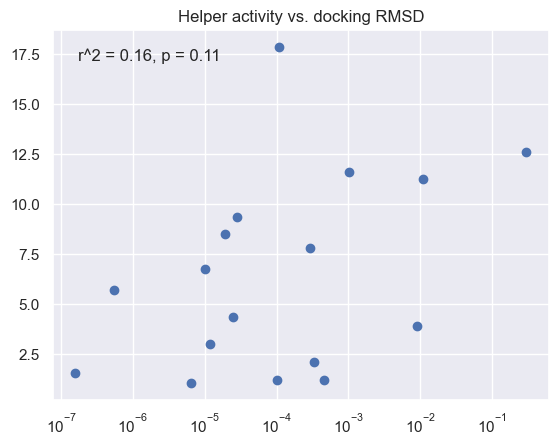

In [107]:
# How does activity for helper ligand correspond to rmsd?
from scipy.stats import linregress

act_file = "/Users/ryan/sherlock_home/combind_multistruct_benchmarking/benchmark/activities.csv"
act = pd.read_csv(f1)

acts = []
rmsds = []

for prot in act["name"]:
    activity = act[act["name"] == prot]["0"].tolist()[0]
    try:
        rmsd = helper[helper["protein"] == prot]["combind_rmsd"].tolist()[0]
        if np.isnan(activity) or np.isnan(rmsd): continue
        acts.append(activity)
        rmsds.append(rmsd)
    except:
        continue
    
plt.scatter(acts, rmsds)
ax = plt.gca()
ax.set_xscale("log")
ax.set_title("Helper activity vs. docking RMSD")

slope, intercept, r_value, p_value, std_err = linregress(-np.log(acts), rmsds)
print(f"{r_value=}, {p_value=}")

plt.text(.05, .95, f"r^2 = {round(r_value ** 2, 2)}, p = {round(p_value, 2)}", ha='left', va='top', transform=ax.transAxes)
plt.show()



GRM2 7E9G_lig failed
NK1R 6E59_lig failed
r_value=-0.0304690667545983, p_value=0.8156822043756455


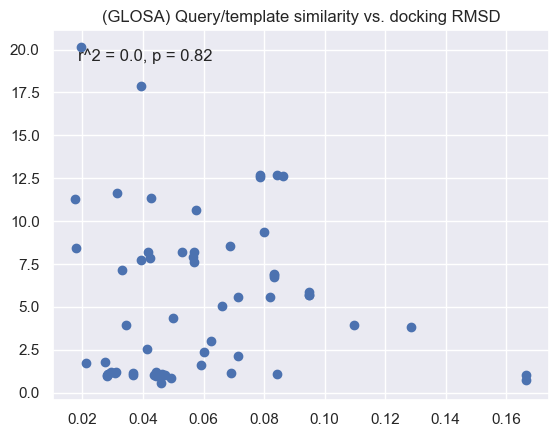

GRM2 7E9G_lig failed
NK1R 6E59_lig failed
r_value=-0.17068426735508965, p_value=0.18844849867014413


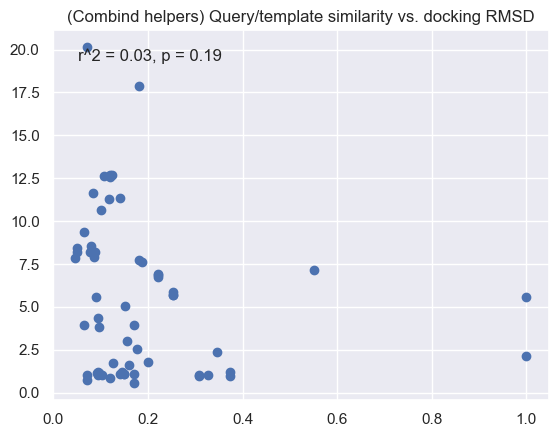

In [128]:
# How does chemical similarity between query ligand and minimization template ligand change docking rmsd?
from rdkit.Chem import rdmolfiles, AllChem
from rdkit import DataStructs
from scipy.stats import linregress
import gzip
import glob

glosa_src = "/Users/ryan/sherlock_oak/projects/ligand-docking/modeled_structures/glosa_mods_debug"
helper_src = "/Users/ryan/sherlock_oak/projects/ligand-docking/modeled_structures/dock_min_exp"

def get_templates(src):
    mols = {}
    for p in os.listdir(src):
        template = glob.glob(os.path.join(src, p, "structures/raw/*_lig.mae"))[0]
        mol = next(rdmolfiles.MaeMolSupplier(template))
        mols[p] = mol
    return mols

glosa_templates = get_templates(glosa_src)
helper_templates = get_templates(helper_src)

def analyze(templates, src, key):
    tcs = []
    rmsds = []
    for prot, template_mol in templates.items():
        for ligdir in glob.glob(os.path.join(src, prot, "ligands", "*_lig")):
            ligfile = glob.glob(os.path.join(ligdir, "*_lig.maegz"))[0]
            ligid = ligfile[ligfile.rfind("/") + 1:]
            ligid = ligid.rstrip("maegz")[:-1]

            dock_mol = next(rdmolfiles.MaeMolSupplier(gzip.open(ligfile)))

            fp_dock = AllChem.GetMorganFingerprintAsBitVect(template_mol, 3)
            fp_template = AllChem.GetMorganFingerprintAsBitVect(dock_mol, 3)

            tc = DataStructs.TanimotoSimilarity(fp_dock, fp_template)
            try:
                sele = helper[helper["protein"] == prot]
                sele = sele[sele["lig"] == ligid]
                rmsd = sele["combind_rmsd"].tolist()[0]
                if np.isnan(rmsd):
                    continue

                rmsds.append(rmsd)
                tcs.append(tc)

            except IndexError:
                print(prot, ligid, "failed")
                continue

    plt.scatter(tcs, rmsds)
    ax = plt.gca()
    ax.set_title(f"({key}) Query/template similarity vs. docking RMSD")

    slope, intercept, r_value, p_value, std_err = linregress(tcs, rmsds)
    print(f"{r_value=}, {p_value=}")

    plt.text(.05, .95, f"r^2 = {round(r_value ** 2, 2)}, p = {round(p_value, 2)}", ha='left', va='top', transform=ax.transAxes)
    
analyze(glosa_templates, glosa_src, "GLOSA")
plt.show()
analyze(helper_templates, helper_src, "Combind helpers")
plt.show()

In [86]:
%matplotlib notebook
# How does this breakdown across protein?
import math
prots = rmsd_df["protein"].value_counts().keys()
fig, axes = plt.subplots(math.ceil(len(prots) / 5), 5)

for prot, ax in zip(prots, axes.flat):
    original = rmsd_df[rmsd_df["protein"] == prot]
    glosa_ = glosa[glosa["protein"] == prot]
    plot(original, label="original glide", ax=ax)
    plot(glosa_, label="glosa glide", ax=ax)
    

<IPython.core.display.Javascript object>

ValueError: 'yerr' must not contain negative values

In [61]:
rmsd_df.columns

In [62]:
rmsd_df.columns